In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp
import analysis.plotting as plotting

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
q2.ge_time = 23.610582067254867
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")

Qubit(qubit_thr=[-10000, -600], ge_ssm=-0.114, ro_freq=6.72742, ro_dur=4000, RO_LO=6.6247, ef_amp=1, ge_amp=0.5, ef_time=77, qubit_id=q1, IQ_angle=205, RO_IF=None, ROIF=0.10272000000000059, ef_ssm=-0.257, ge_time=66.83921813916868, ro_amp=0.6, RO_LO_pwr=16)
Qubit(qubit_thr=[-10000, 1900], ge_ssm=-0.154, ro_freq=6.6556, ro_dur=4000, RO_LO=6.6247, ef_amp=1, ge_amp=1, ef_time=None, qubit_id=q2, IQ_angle=85, RO_IF=None, ROIF=0.030899999999999928, ef_ssm=-0.224, ge_time=23.610582067254867, ro_amp=0.4, RO_LO_pwr=16)


In [3]:
def run_pi_no_pi(q1,q2,general_vals_dict,num_steps, reps):
    pnp.pi_nopi_ge(0, 0, q1, q2, general_vals_dict)
    pnp.pi_nopi_ge(1, 1, q1, q2, general_vals_dict)
    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    # Acquire the raw IQ data
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
    )
    return values

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 15000
Buffers per acquistion: 15
DAQ samples per pattern: 8192
0, No error
Capturing 15 buffers. Press <enter> to abort
Capture completed in 6.323015 sec
Captured 15 buffers (2.372286 buffers per sec)
Captured 46080 records (7287.662090 records per sec)
Transferred 754974720 bytes (119401055.682871 bytes per sec)


<Figure size 800x800 with 0 Axes>

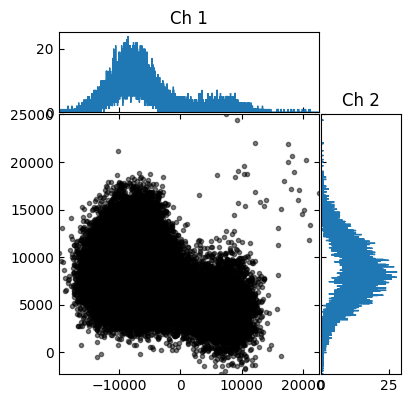

<Figure size 800x800 with 0 Axes>

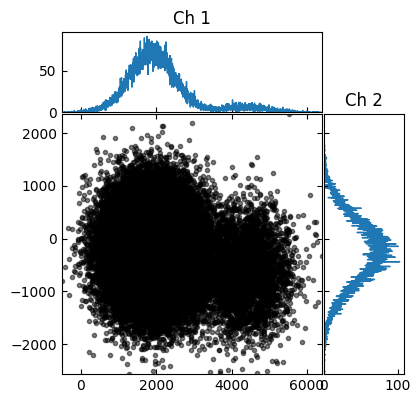

In [4]:
reps = 15000
num_steps = 3
values = run_pi_no_pi(q1,q2,general_vals_dict,num_steps=3, reps = reps)

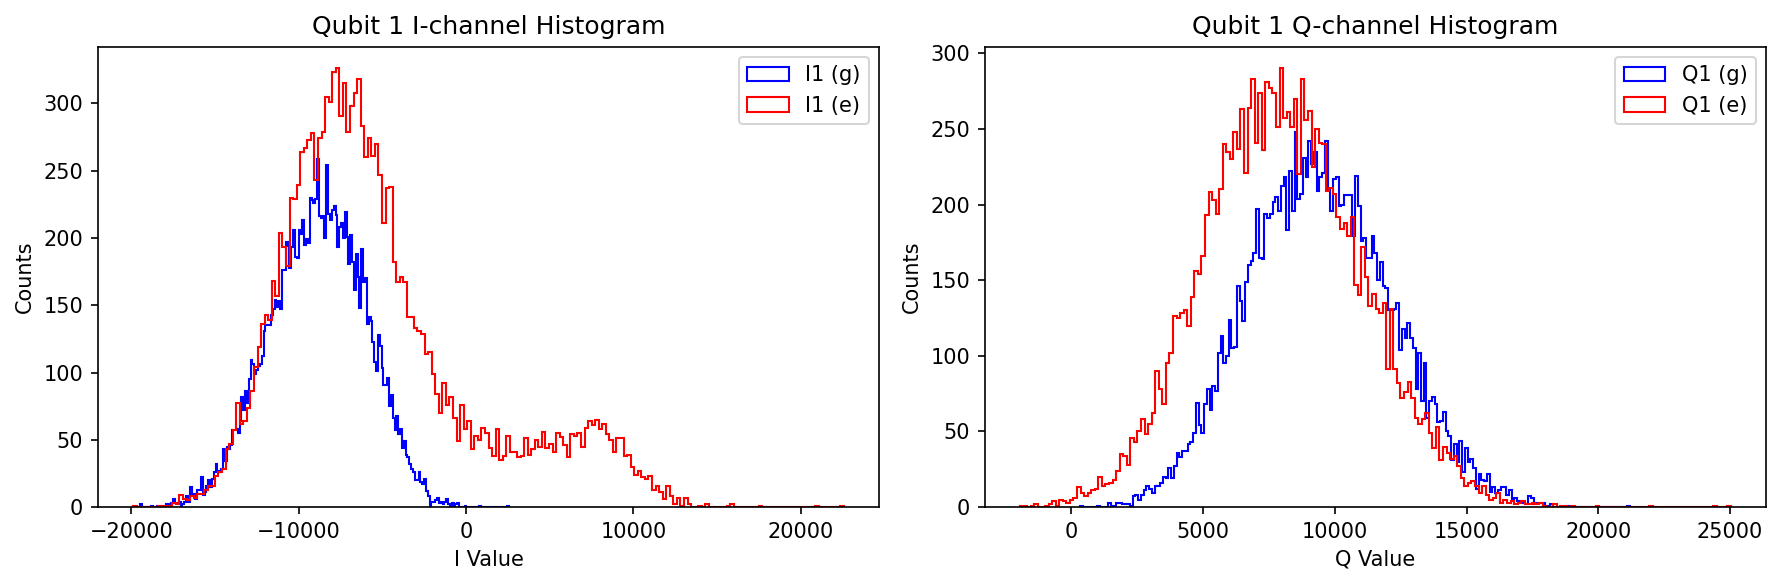

SNR of Qubit 1: 0.6439878370016754


In [8]:
fit_params = plotting.plot_IQ_histograms(values.rec_readout_vs_pats_1, qubit_num=1)
SNR = plotting.calculate_SNR(fit_params)
print(f"SNR of Qubit 1: {SNR}")